In [5]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
torch.__version__

'1.12.0'

In [7]:
data = pd.read_csv("./data/income.csv")

In [8]:
data.head()

,Education,Income
0,10.00,26.66
1,10.40,27.31
2,10.84,22.13
3,11.24,21.17
4,11.65,15.19


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  29 non-null     float64
 1   Income     29 non-null     float64
dtypes: float64(2)
memory usage: 592.0 bytes


Text(0, 0.5, 'Income')

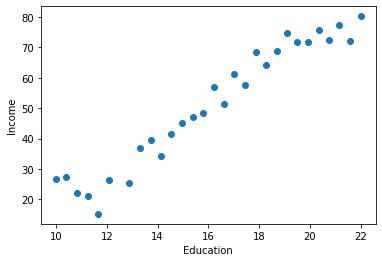

In [10]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')

In [11]:
X = data.Education.values
X

array([10.  , 10.4 , 10.84, 11.24, 11.65, 12.09, 12.89, 13.29, 13.73,
       14.13, 14.54, 14.98, 15.38, 15.78, 16.22, 16.62, 17.02, 17.46,
       17.87, 18.26, 18.71, 19.11, 19.51, 19.91, 20.35, 20.76, 21.16,
       21.6 , 22.  ])

In [19]:
# tensor 
X = torch.from_numpy(data.Education.values.reshape(-1,1)).type(torch.FloatTensor)
Y = torch.from_numpy(data.Income.values.reshape(-1,1)).type(torch.FloatTensor)

In [21]:
X.shape,Y.shape

(torch.Size([29, 1]), torch.Size([29, 1]))

In [25]:
from torch import nn

In [26]:
class ELModel(nn.Module):
    def __init__(self):
        super(ELModel, self).__init__()
        self.linear = nn.Linear(in_features = 1, out_features = 1)
    def forward(self, inputs):
        logits = self.linear(inputs)
        return logits

In [28]:
model = ELModel()
model

ELModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [29]:
# 均方 损失函数
loss_fn = nn.MSELoss()

In [33]:
# 优化器
opt = torch.optim.SGD(model.parameters(), lr=0.0001)

In [34]:
for epoch in range(5000):
    for x,y in zip(X,Y):
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        opt.zero_grad()
        loss.backward()
        # 优化
        opt.step()

In [35]:
list(model.parameters())

[Parameter containing:
 tensor([[4.8199]], requires_grad=True),
 Parameter containing:
 tensor([-25.5402], requires_grad=True)]

In [37]:
model.linear

Linear(in_features=1, out_features=1, bias=True)

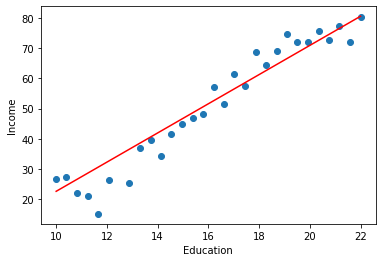

In [39]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')

plt.plot(X, model(X).detach().numpy(),c="red")

In [ ]:
# 输入数据 ， 创建模型  训练 预测 评价